In [1]:
print("shrishti")


shrishti


In [3]:
!pip install matplotlib
!pip install numpy
!pip install panda

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7238 sha256=e8ce96ac86cbaa34cc4bbe418fd32067c1723f5c5bd37567786f509130015c18
  Stored in directory: /Users/shrishtimishra/Library/Caches/pip/wheels/df/5c/39/36f8dae25a1e88d6ec4411dec4a143781e64fdff6897758eec
Successfully built panda


In [4]:
!pip install jax


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 26.8 MB/s eta 0:00:0000:0100:01


In [3]:
!pip install --upgrade jax jaxlib

  Using cached jaxlib-0.4.23-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 MB 17.2 MB/s eta 0:00:0000:0100:01


In [1]:
!pip install sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 15.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 29.7 MB/s eta 0:00:00


#Q1 
If we have matrix P of size(n,k) and matrix Q of size(k,m) then the resulting matrix after multiplication would be of size(n,m).
In order to compute each element of resulting matrix, we need one multiplication for each pairs of corresponding elements in row of matrix P
and column of matrix Q and then sum up these products. Each row of matrix P and column of matrix Q have k elements so we will have to perform
k multiplication and k-1 addition. And the resulting matrix has m*n elements. 
So, total number of multiplication is n*m*k
total number of addition is n*m*(k-1)





In [14]:
#Q2
import timeit
import numpy as np


def matrix_multiplication(p, q):
    if len(p[0]) != len(q):
        raise ValueError("Number of columns in Matrix P is not equal to the number of rows in matrix Q")
    F = [[0 for _ in range(len(q[0]))] for _ in range(len(p))]
    for i in range(len(p)):
        for j in range(len(q[0])):
            for k in range(len(q)):
                F[i][j] += p[i][k] * q[k][j]
    return F


def matrix_multiply_numpy(p, q):
    return np.dot(p, q)


rows_P = int(input("Enter the number of rows for matrix P: "))
cols_P = int(input("Enter the number of columns for matrix P: "))
P = [[int(input(f"Enter element P[{i}][{j}]: ")) for j in range(cols_P)] for i in range(rows_P)]

rows_Q = int(input("Enter the number of rows for matrix Q: "))
cols_Q = int(input("Enter the number of columns for matrix Q: "))
Q = [[int(input(f"Enter element Q[{i}][{j}]: ")) for j in range(cols_Q)] for i in range(rows_Q)]

time_list = timeit.timeit(lambda: matrix_multiplication(P, Q), number=10000)

P_np = np.array(P)
Q_np = np.array(Q)
time_numpy = timeit.timeit(lambda: matrix_multiply_numpy(P_np, Q_np), number=10000)

print(f"Time using list of lists: {time_list:.6f} seconds")
print(f"Time using NumPy: {time_numpy:.6f} seconds")

Enter the number of rows for matrix P:  3
Enter the number of columns for matrix P:  1
Enter element P[0][0]:  1
Enter element P[1][0]:  1
Enter element P[2][0]:  1
Enter the number of rows for matrix Q:  1
Enter the number of columns for matrix Q:  1
Enter element Q[0][0]:  12


Time using list of lists: 0.046709 seconds
Time using NumPy: 0.010835 seconds


#Q3 
Discovering the maximum value in the array would be with single pass through the array. However, determining the second-highest element requires two passes. When employing this particular method, the time complexity for finding the median would be $$[ O(N^2) ]$$


In [50]:
#Q3
import timeit
import numpy as np

def find_median_two_pass(arr):
    max_val = max(arr)
    arr.remove(max_val)
    second_max_val = max(arr)
    return (max_val + second_max_val) / 2 if len(arr) % 2 == 0 else second_max_val

def quickselect_median(arr):
    arr_sorted = sorted(arr)
    n = len(arr_sorted)
    return arr_sorted[n // 2] if n % 2 == 1 else (arr_sorted[n // 2 - 1] + arr_sorted[n // 2]) / 2

arr = list(np.random.randint(1, 100, size=10000))

time_two_pass = timeit.timeit(lambda: find_median_two_pass(arr.copy()), number=100)
time_quickselect = timeit.timeit(lambda: quickselect_median(arr.copy()), number=100)
time_numpy = timeit.timeit(lambda: np.median(arr), number=100)

print(f"Time using two-pass method: {time_two_pass:.6f} seconds")
print(f"Time using quickselect method: {time_quickselect:.6f} seconds")
print(f"Time using NumPy median method: {time_numpy:.6f} seconds")


Time using two-pass method: 0.040473 seconds
Time using quickselect method: 0.133917 seconds
Time using NumPy median method: 0.028541 seconds


In [31]:
#4
import numpy as np

def function(x, y):
    return x**2 * y + y**3 * np.sin(x)

def gradient_numerical(x, y, epsilon=1e-6):
    df_dx = (function(x + epsilon, y) - function(x - epsilon, y)) / (2 * epsilon)
    df_dy = (function(x, y + epsilon) - function(x, y - epsilon)) / (2 * epsilon)
    return df_dx, df_dy

print(df_dx)
print(df_dy)


2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


In [36]:
#5
import jax
import jax.numpy as jnp


def function(x, y):
    return x*2 * y + y*3 * jnp.sin(x)


gradient_jax = jax.grad(function, argnums=(0, 1))


x_value = 2.0
y_value = 3.0

result_jax = gradient_jax(x_value, y_value)
print("Gradient at (x={}, y={}): {}".format(x_value, y_value, result_jax))

Gradient at (x=2.0, y=3.0): (Array(2.2546785, dtype=float32, weak_type=True), Array(6.727892, dtype=float32, weak_type=True))


In [29]:
#6
import sympy as sp


x, y = sp.symbols('x y')


f = x**2 * y + y**3 * sp.sin(x)


df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)


print("Partial derivative with respect to x:")
print(df_dx)

print("\nPartial derivative with respect to y:")
print(df_dy)




Partial derivative with respect to x:
2*x*y + y**3*cos(x)

Partial derivative with respect to y:
x**2 + 3*y**2*sin(x)


In [47]:
#Q7
record = {
    '2022': {
        'Computer Science and Engineering': [
            {'Roll Number': 101, 'Name': 'Ram', 'Marks': {'Math': 92, 'Physics': 87, 'History': 75}},
            {'Roll Number': 102, 'Name': 'Sohan', 'Marks': {'Math': 88, 'Physics': 80, 'History': 68}}
        ],
        'Electrical Engineering': [
            {'Roll Number': 201, 'Name': 'Shyam', 'Marks': {'Math': 94, 'Physics': 75, 'History': 92}},
            {'Roll Number': 202, 'Name': 'David', 'Marks': {'Math': 89, 'Physics': 87, 'History': 70}}
        ]
    },
    '2021': {
        'Computer Science and Engineering': [
            {'Roll Number': 111, 'Name': 'Eve', 'Marks': {'Math': 95, 'Physics': 88, 'History': 80}},
            {'Roll Number': 112, 'Name': 'Rohan', 'Marks': {'Math': 91, 'Physics': 78, 'History': 72}}
        ],
        'Electrical Engineering': [
            {'Roll Number': 211, 'Name': 'Sohel', 'Marks': {'Math': 96, 'Physics': 79, 'History': 95}},
            {'Roll Number': 212, 'Name': 'Harsh', 'Marks': {'Math': 90, 'Physics': 88, 'History': 74}}
        ]
    },
    '2023': {
        'Computer Science and Engineering': [],
        'Electrical Engineering': []
    },
    '2024': {
        'Computer Science and Engineering': [],
        'Electrical Engineering': []
    },
    '2025': {
        'Computer Science and Engineering': [],
        'Electrical Engineering': []
    }
}

print(record)


{'2022': {'Computer Science and Engineering': [{'Roll Number': 101, 'Name': 'Ram', 'Marks': {'Math': 92, 'Physics': 87, 'History': 75}}, {'Roll Number': 102, 'Name': 'Sohan', 'Marks': {'Math': 88, 'Physics': 80, 'History': 68}}], 'Electrical Engineering': [{'Roll Number': 201, 'Name': 'Shyam', 'Marks': {'Math': 94, 'Physics': 75, 'History': 92}}, {'Roll Number': 202, 'Name': 'David', 'Marks': {'Math': 89, 'Physics': 87, 'History': 70}}]}, '2021': {'Computer Science and Engineering': [{'Roll Number': 111, 'Name': 'Eve', 'Marks': {'Math': 95, 'Physics': 88, 'History': 80}}, {'Roll Number': 112, 'Name': 'Rohan', 'Marks': {'Math': 91, 'Physics': 78, 'History': 72}}], 'Electrical Engineering': [{'Roll Number': 211, 'Name': 'Sohel', 'Marks': {'Math': 96, 'Physics': 79, 'History': 95}}, {'Roll Number': 212, 'Name': 'Harsh', 'Marks': {'Math': 90, 'Physics': 88, 'History': 74}}]}, '2023': {'Computer Science and Engineering': [], 'Electrical Engineering': []}, '2024': {'Computer Science and Engi

In [48]:
#8
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks


class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students


class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches


# Create instances for each student
alice = Student(101, 'Ram', {'Math': 92, 'Physics': 87, 'History': 75})
bob = Student(102, 'Sohan', {'Math': 88, 'Physics': 80, 'History': 68})
charlie = Student(201, 'Shyam', {'Math': 94, 'Physics': 75, 'History': 92})
david = Student(202, 'David', {'Math': 89, 'Physics': 87, 'History': 70})
eve = Student(111, 'Eve', {'Math': 95, 'Physics': 88, 'History': 80})
frank = Student(112, 'Rohan', {'Math': 91, 'Physics': 78, 'History': 72})
grace = Student(211, 'Sohel', {'Math': 96, 'Physics': 79, 'History': 95})
harry = Student(212, 'Harsh', {'Math': 90, 'Physics': 88, 'History': 74})

# Create instances for each branch
cse_branch_2022 = Branch('Computer Science and Engineering', [alice, bob])
ee_branch_2022 = Branch('Electrical Engineering', [charlie, david])
cse_branch_2021 = Branch('Computer Science and Engineering', [eve, frank])
ee_branch_2021 = Branch('Electrical Engineering', [grace, harry])

# Create instances for each year
year_2022 = Year('2022', [cse_branch_2022, ee_branch_2022])
year_2021 = Year('2021', [cse_branch_2021, ee_branch_2021])

# Create a list of year objects (overall database)
database = [year_2022, year_2021]

# Print the overall database
for year in database:
    print(f'\nYear: {year.year}')
    for branch in year.branches:
        print(f'  Branch: {branch.name}')
        for student in branch.students:
            print(f'    Student: {student.name}, Roll Number: {student.roll_number}, Marks: {student.marks}')



Year: 2022
  Branch: Computer Science and Engineering
    Student: Ram, Roll Number: 101, Marks: {'Math': 92, 'Physics': 87, 'History': 75}
    Student: Sohan, Roll Number: 102, Marks: {'Math': 88, 'Physics': 80, 'History': 68}
  Branch: Electrical Engineering
    Student: Shyam, Roll Number: 201, Marks: {'Math': 94, 'Physics': 75, 'History': 92}
    Student: David, Roll Number: 202, Marks: {'Math': 89, 'Physics': 87, 'History': 70}

Year: 2021
  Branch: Computer Science and Engineering
    Student: Eve, Roll Number: 111, Marks: {'Math': 95, 'Physics': 88, 'History': 80}
    Student: Rohan, Roll Number: 112, Marks: {'Math': 91, 'Physics': 78, 'History': 72}
  Branch: Electrical Engineering
    Student: Sohel, Roll Number: 211, Marks: {'Math': 96, 'Physics': 79, 'History': 95}
    Student: Harsh, Roll Number: 212, Marks: {'Math': 90, 'Physics': 88, 'History': 74}


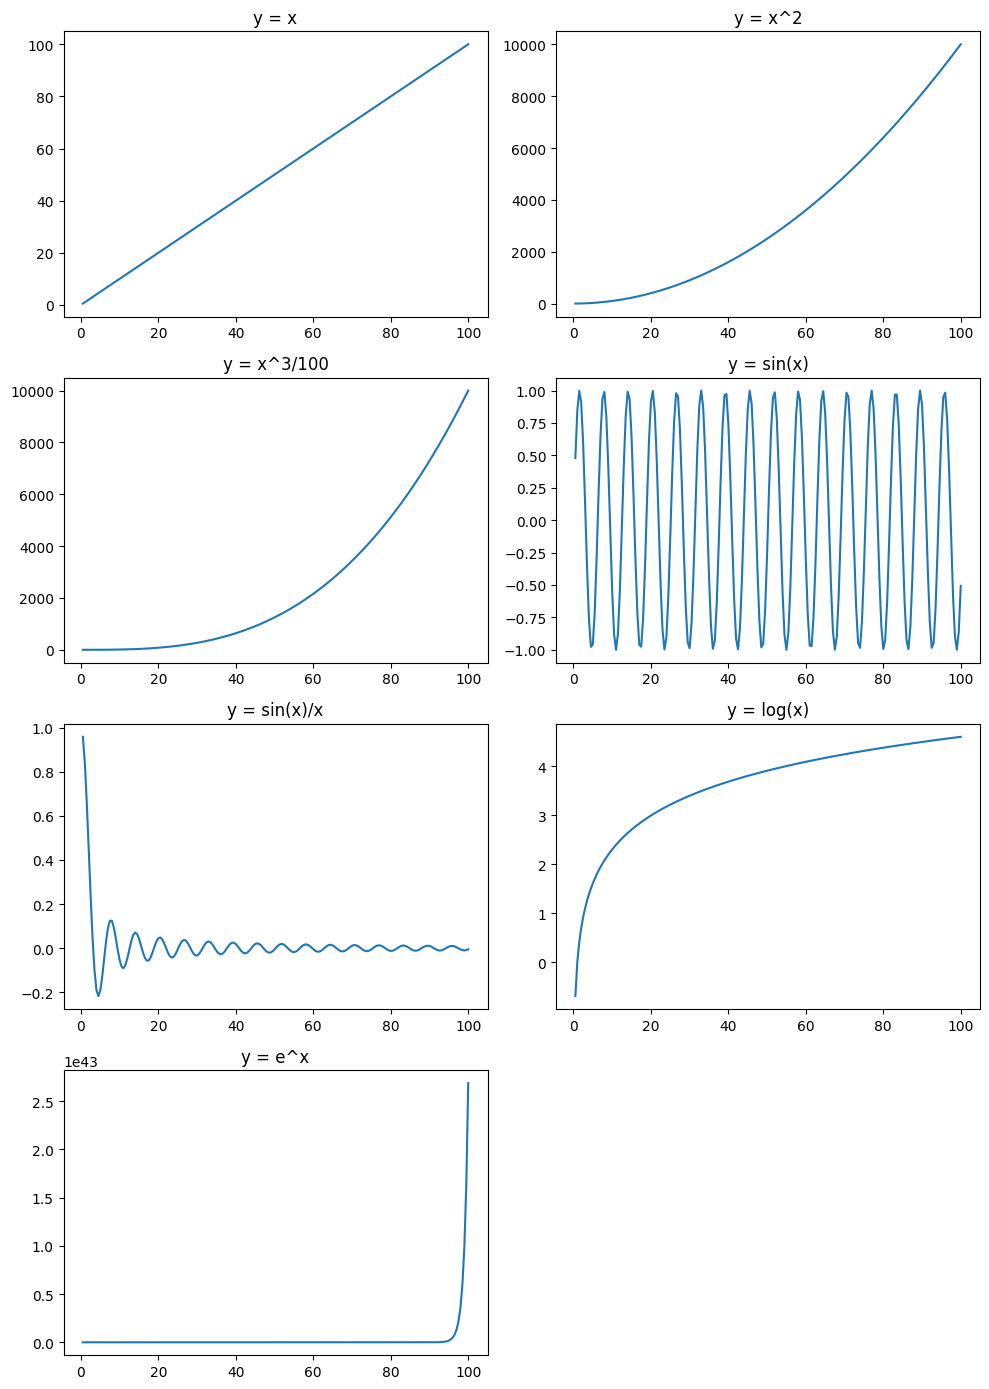

In [23]:
#9
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(0.5, 100.5, 0.5)


y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(10, 14))

plt.subplot(4, 2, 1)
plt.plot(x, y1)
plt.title('y = x')

plt.subplot(4, 2, 2)
plt.plot(x, y2)
plt.title('y = x^2')

plt.subplot(4, 2, 3)
plt.plot(x, y3)
plt.title('y = x^3/100')

plt.subplot(4, 2, 4)
plt.plot(x, y4)
plt.title('y = sin(x)')

plt.subplot(4, 2, 5)
plt.plot(x, y5)
plt.title('y = sin(x)/x')

plt.subplot(4, 2, 6)
plt.plot(x, y6)
plt.title('y = log(x)')

plt.subplot(4, 2, 7)
plt.plot(x, y7)
plt.title('y = e^x')

plt.tight_layout()
plt.show()


In [12]:
#10
import numpy as np
import pandas as pd
Matrix = np.random.uniform(1,2,size=(20,5))
df = pd.DataFrame(Matrix, columns = ['a', 'b', 'c', 'd', 'e'])
max_stddev_column = df.std().idxmax()
min_mean_row = df.mean(axis = 1).idxmin()
print("DataFrame:")
print(df)
print("\nColumn with the highest standard deviation:", max_stddev_column)
print("Row with the lowest mean:", min_mean_row)

DataFrame:
           a         b         c         d         e
0   1.641611  1.214844  1.841241  1.331606  1.644398
1   1.877101  1.748130  1.414534  1.548156  1.024063
2   1.763214  1.943626  1.894323  1.214901  1.020969
3   1.885874  1.860744  1.029260  1.677303  1.971244
4   1.902426  1.887964  1.384921  1.575542  1.065358
5   1.412379  1.385193  1.158168  1.426060  1.438796
6   1.992292  1.710856  1.594245  1.032619  1.560906
7   1.450749  1.261804  1.499923  1.131707  1.750915
8   1.153669  1.207344  1.420331  1.217620  1.272222
9   1.177472  1.862289  1.675254  1.954995  1.318499
10  1.199638  1.698812  1.089504  1.809652  1.477897
11  1.139252  1.747729  1.048147  1.213817  1.985523
12  1.377671  1.684540  1.895108  1.775550  1.235231
13  1.560954  1.786273  1.503803  1.024844  1.018536
14  1.973673  1.554216  1.571789  1.314117  1.523896
15  1.403778  1.046439  1.281586  1.602110  1.324937
16  1.524215  1.293606  1.062292  1.634406  1.710358
17  1.022292  1.688727  1.508712  1

In [16]:
#11
import numpy as np
import pandas as pd
Matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(Matrix, columns=['a', 'b', 'c', 'd', 'e'])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

lt8_count = len(df[df['g'] == 'LT8'])

std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("DataFrame:")
print(df)
print("\nNumber of rows where the value in column 'g' is 'LT8':", lt8_count)
print("Standard deviation of column 'f' for rows where the value in column 'g' is 'LT8':", std_lt8)
print("Standard deviation of column 'f' for rows where the value in column 'g' is 'GT8':", std_gt8)


DataFrame:
           a         b         c         d         e         f    g
0   1.719911  1.790407  1.571514  1.008675  1.713145  7.803653  LT8
1   1.189926  1.557756  1.049411  1.994622  1.497764  7.289479  LT8
2   1.524313  1.101516  1.014165  1.413116  1.179241  6.232351  LT8
3   1.053243  1.306947  1.791464  1.769901  1.683122  7.604676  LT8
4   1.147639  1.313589  1.791957  1.972087  1.614112  7.839384  LT8
5   1.286378  1.879738  1.256591  1.110608  1.436538  6.969854  LT8
6   1.615502  1.213060  1.544645  1.279936  1.326646  6.979788  LT8
7   1.463047  1.558726  1.633285  1.731930  1.548864  7.935851  LT8
8   1.501298  1.457161  1.229072  1.191429  1.586531  6.965491  LT8
9   1.043749  1.397991  1.885138  1.049895  1.690021  7.066793  LT8
10  1.015074  1.712124  1.333023  1.153239  1.182395  6.395855  LT8
11  1.062394  1.220227  1.104947  1.425616  1.433854  6.247039  LT8
12  1.346572  1.455871  1.651447  1.239088  1.244465  6.937443  LT8
13  1.956801  1.413452  1.076524  1.9

In [17]:
#12
import numpy as np
scalar_value = 5
array = np.array([1, 2, 3, 4, 5])

result = scalar_value * array

print("Array:")
print(array)
print("Result after broadcasting a scalar:")
print(result)


matrix = np.array([[1, 2, 3], [4, 5, 6]])
column_vector = np.array([[10], [20]])

result = matrix + column_vector

print("\nMatrix:")
print(matrix)
print("Column Vector:")
print(column_vector)
print("Result after broadcasting arrays of different shapes:")
print(result)


Array:
[1 2 3 4 5]
Result after broadcasting a scalar:
[ 5 10 15 20 25]

Matrix:
[[1 2 3]
 [4 5 6]]
Column Vector:
[[10]
 [20]]
Result after broadcasting arrays of different shapes:
[[11 12 13]
 [24 25 26]]


In [22]:
#13
import numpy as np

def custom_argmin(arr):
    if not isinstance(arr, np.ndarray):
        raise ValueError("Input must be a NumPy array.")

    if arr.size == 0:
        raise ValueError("Array must not be empty.")

    min_index = 0
    for i in range(1, arr.size):
        if arr[i] < arr[min_index]:
            min_index = i

    return min_index

array_example = np.array([3, 1, 4, 1, 5, 9, 2, 6, -2, 3, 5])
min_index_custom = custom_argmin(array_example)
min_index_np = np.argmin(array_example)

print("Array:", array_example)
print("Index of the minimum element (custom):", min_index_custom)
print("Index of the minimum element (NumPy):", min_index_np)


Array: [ 3  1  4  1  5  9  2  6 -2  3  5]
Index of the minimum element (custom): 8
Index of the minimum element (NumPy): 8
